## 1 AI, machine learning and deep learning

Onset detection = Bir müzik notasının başlangıcını belirleme

* başlangıç noktaları belirlenen verilerin modele sokulması ile beraber oluşturulan modele supervised learning denir.

## 2 Implementing an Artificial Neuron from Scratch


In [26]:
import math
from random import random

def sigmoid(x):
  return 1.0 / (1 + math.exp(-x))

In [ ]:
def activate(inputs, weights):
  h=0
  for x, w in zip(inputs, weights):
    h += x*w

  return sigmoid(h)

In [ ]:
inputs = [.3, .5, .6]
weights = [.4, .7, .2]

In [ ]:
activate(inputs, weights)

0.6433651456944017

## 3 Implementing a Neural Network from Scratch in Python

In [16]:
import numpy as np

In [17]:
class MLP:
  def __init__(self, num_inputs = 3, num_hidden = [3,5], num_outputs = 2):
    self.num_inputs = num_inputs
    self.num_hidden = num_hidden
    self.num_outputs  = num_outputs

    layers = [self.num_inputs] + self.num_hidden + [self.num_outputs]

    self.weight = []

    for i in range(len(layers)-1):
      w = np.random.rand(layers[i], layers[i+1])
      self.weight.append(w)

  def forward(self, inputs):
    activations = inputs

    for w in self.weight:
      net_inputs = np.dot(activations, w) 

      activations = self._sigmoid(net_inputs) 
      

    return activations

  def _sigmoid(self, x):
    return 1 / (1 + np.exp(-x))   


In [18]:
mlp = MLP()

In [19]:
inputs = np.random.randn(mlp.num_inputs)
inputs.shape

(3,)

In [20]:
outputs = mlp.forward(inputs)
outputs.shape

(2,)

In [21]:
print(f'inputs: {inputs}')
print(f'outputs: {outputs}')

inputs: [-0.55732208 -0.77823284 -1.30089015]
outputs: [0.76051525 0.75041389]


## 4 Training a Neural Network: Implementing Backpropagation and Gradient Descent from Scratch

In [27]:
class MLP:
  def __init__(self, num_inputs = 3, num_hidden = [3,5], num_outputs = 2):
    self.num_inputs = num_inputs
    self.num_hidden = num_hidden
    self.num_outputs  = num_outputs

    layers = [self.num_inputs] + self.num_hidden + [self.num_outputs]

    self.weights = []

    for i in range(len(layers)-1):#ağırlıkları belirledik
      w = np.random.rand(layers[i], layers[i+1])
      self.weights.append(w)

    activations = []
    for i in range(len(layers)):#aktivasyon değerlerini sakladık
      a = np.zeros(layers[i])
      activations.append(a)
    self.activations = activations

    #ağırlıklara göre türevdir, türevleri sakladık
    derivatives = []
    for i in range(len(layers) - 1):
      d = np.zeros((layers[i], layers[i + 1]))
      derivatives.append(d)
    self.derivatives = derivatives

  def forward_propagate(self, inputs):
    activations = inputs
    self.activations[0] = activations

    for i, w in enumerate(self.weights):
      net_inputs = np.dot(activations, w) 

      activations = self._sigmoid(net_inputs) 
      self.activations[i+1] = activations
      
    return activations

  def back_propagate(self, error, verbose = False):
    for i in reversed(range(len(self.derivatives))):
      activations = self.activations[i+1]

      delta = error * self._sigmoid_derivative(activations)#sonraki adımın activasyonu ile hesaplanır  [0.1, 0.2] => [[0.1, 0.2]]
      delta_reshape = delta.reshape(delta.shape[0], -1).T

      current_activations = self.activations[i]# [0.1, 0.2] => [[0.1], [0.2]]
      current_activations_reshape = current_activations.reshape(current_activations.shape[0],-1)

      self.derivatives[i] = np.dot(current_activations_reshape, delta_reshape)
      
      error = np.dot(delta, self.weights[i].T)

      if verbose:
        print(f'Derivatives for W{i}: {self.derivatives[i]}')
  
  def train(self, inputs, targets, epochs, lr):
    for epoch in range(epochs):
      sum_error = 0
      for input, target in zip(inputs, targets):
        output = self.forward_propagate(input)

        error = target - output

        self.back_propagate(error)

        self.gradient_descent(lr)

        sum_error += self._mse(target, output) 

      print(f'Error: {sum_error/len(inputs)} at epoch {epoch}')

  def _mse(self, target, output):
    return np.average((target - output)**2)

  def gradient_descent(self, lr):
    for i in range(len(self.weights)):
      weights = self.weights[i]
      derivatives = self.derivatives[i]
      weights += derivatives * lr

  def _sigmoid_derivative(self, x):
    return x * (1.0 - x )

  def _sigmoid(self, x):
    return 1 / (1 + np.exp(-x))   


In [28]:
mlp = MLP(2, [5], 1)

In [29]:
items = np.array([[random()/2 for _ in range(2)] for _ in range(1000)])
targets = np.array([[i[0] + i[1]] for i in items])

In [30]:
mlp.train(items, targets, 300, 0.01)

Error: 0.06695820166703634 at epoch 0
Error: 0.04668937930971433 at epoch 1
Error: 0.04290987544592165 at epoch 2
Error: 0.04231398350852697 at epoch 3
Error: 0.04220104813140476 at epoch 4
Error: 0.042160919829318445 at epoch 5
Error: 0.04213267497786867 at epoch 6
Error: 0.04210661124895305 at epoch 7
Error: 0.042080914702700416 at epoch 8
Error: 0.042055147379692424 at epoch 9
Error: 0.04202916643549502 at epoch 10
Error: 0.04200290866366047 at epoch 11
Error: 0.041976336230631246 at epoch 12
Error: 0.04194942006418406 at epoch 13
Error: 0.04192213415666534 at epoch 14
Error: 0.04189445350193512 at epoch 15
Error: 0.04186635332584544 at epoch 16
Error: 0.04183780879025276 at epoch 17
Error: 0.041808794872332904 at epoch 18
Error: 0.041779286309143945 at epoch 19
Error: 0.04174925756659902 at epoch 20
Error: 0.0417186828176658 at epoch 21
Error: 0.041687535924149186 at epoch 22
Error: 0.041655790419958726 at epoch 23
Error: 0.04162341949508538 at epoch 24
Error: 0.041590395980003025 

In [32]:
input = np.array([0.3, 0.1])
target = np.array([0.4])

In [33]:
output = mlp.forward_propagate(input)

In [34]:
print("Our network believes that {} + {} is equal to {}".format(input[0], input[1], output[0]))


Our network believes that 0.3 + 0.1 is equal to 0.41755714852382453


## 5 How to Implement a (Simple) Neural Network with TensorFlow 2


In [1]:
import numpy as np
from random import random
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
#Dataset
def generate_dataset(num_samples, test_size):
  x = np.array([[random()/2 for _ in range(2)] for _ in range(num_samples)])
  y = np.array([[i[0] + i[1]] for i in x])

  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = test_size)
  return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = generate_dataset(5000, 0.3)

In [15]:
X_train

array([[0.08925449, 0.08421585],
       [0.07553226, 0.10653959],
       [0.24037283, 0.35560557],
       ...,
       [0.01367677, 0.34422349],
       [0.21477538, 0.22504036],
       [0.45236777, 0.46953863]])

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, input_dim = 2, activation='sigmoid'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) 
model.compile(optimizer = optimizer, loss = 'MSE')

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
110/110 [==============================] - 1s 1ms/step - loss: 0.0430
Epoch 2/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0394
Epoch 3/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0389
Epoch 4/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0385
Epoch 5/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0380
Epoch 6/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0376
Epoch 7/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0371
Epoch 8/100
110/110 [==============================] - 0s 979us/step - loss: 0.0366
Epoch 9/100
110/110 [==============================] - 0s 1000us/step - loss: 0.0361
Epoch 10/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0356
Epoch 11/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0351
Epoch 12/100
110/110 [==============================] - 0s 1ms/step - loss: 0.0346
Epoch 13

In [ ]:
model.evaluate(X_test, y_test, verbose = 1)

47/47 [==============================] - 0s 966us/step - loss: 6.2159e-04


0.0006215926259756088

In [ ]:
data = np.array([[0.1, 0.2], [0.2, 0.2]])
predictions = model.predict(data)
print(data)
print(predictions)

[[0.1 0.2]
 [0.2 0.2]]
[[0.3008837 ]
 [0.39698339]]


## 6 Preprocessing Audio Data for Deep Learning

In [ ]:
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np


file = './drive/MyDrive/AudioData/blues.00000.wav'

In [ ]:
# waveform
signal, sr = librosa.load(file, sr = 22050)
print(f'Ses süresi : {signal.shape[0] / sr}')

Ses süresi : 30.013333333333332


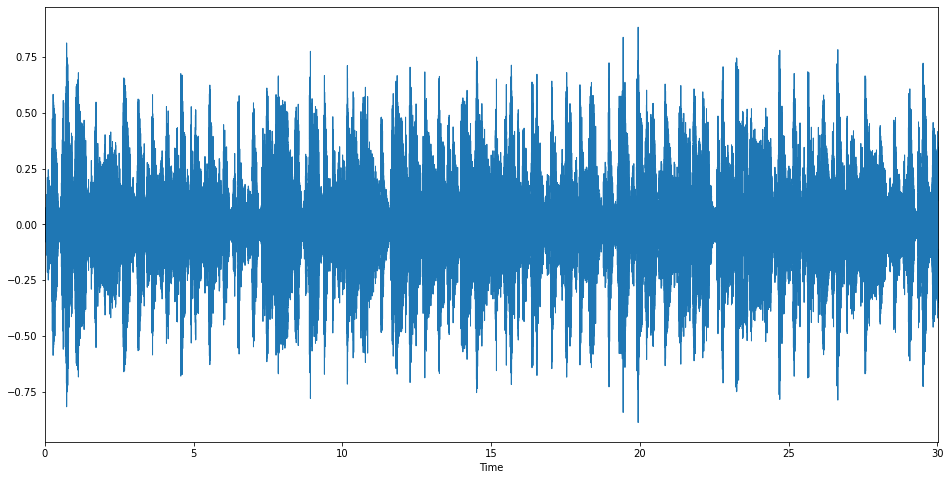

In [ ]:
plt.figure(figsize=(16,8))
librosa.display.waveplot(signal, sr = sr)

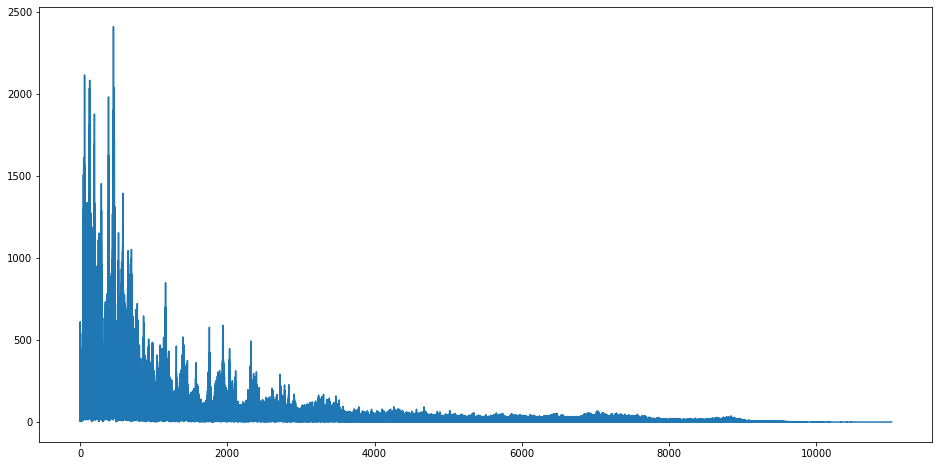

In [ ]:
#fft ->spectrum
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.figure(figsize=(16,8))
plt.plot(left_frequency, left_magnitude);

In [ ]:
#stft
stft = librosa.stft(signal, hop_length=512,  n_fft=2048)
spec = np.abs(stft)

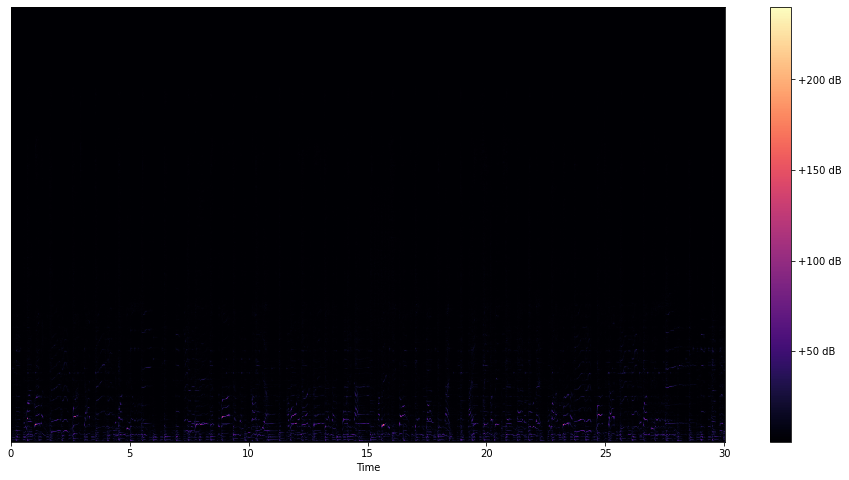

In [ ]:
plt.figure(figsize=(16,8))
librosa.display.specshow(spec, sr = sr, hop_length=512, x_axis='time')#spectogram 
plt.colorbar(format = '%+2.0f dB')

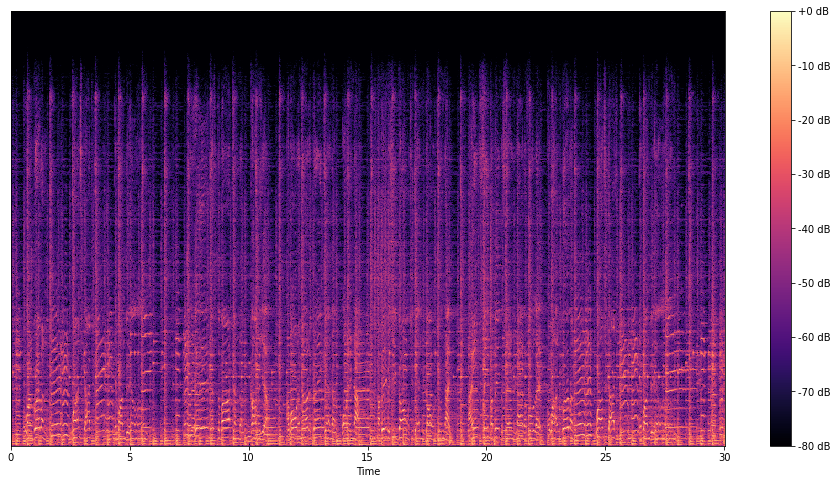

In [ ]:
log_spec = librosa.amplitude_to_db(spec, ref = np.max)
plt.figure(figsize=(16,8))
librosa.display.specshow(log_spec, sr = sr, hop_length=512, x_axis='time')#spectogram 
plt.colorbar(format = '%+2.0f dB')

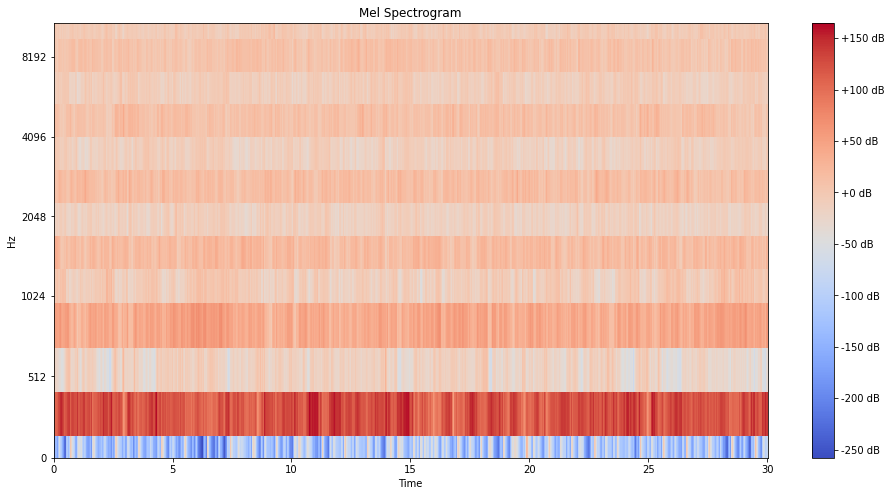

In [ ]:
#mfccs
mel_spec = librosa.feature.mfcc(signal, sr = sr, hop_length=512,  n_fft=2048, n_mfcc = 13)
plt.figure(figsize=(16,8))
librosa.display.specshow(mel_spec, x_axis='time', y_axis='mel')#spectogram 
plt.title('Mel Spectrogram')
plt.colorbar(format = '%+2.0f dB')

## 7 Music Genre Classification: Preparing the Dataset


In [ ]:
import os 
import librosa
import math
import json

DATASET_PATH = "./drive/MyDrive/AudioData/genres"
JSON_PATH = "data.json"
SAMPLE_RATE = 22050 
DURATION = 30
SAMPLE_PER_TRACK = SAMPLE_RATE * DURATION

def save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_lenght=512, num_segments=5):
  #dictionary to store data
  data = {
      "mapping":[],#genreler
      "mfcc":[],#buraya ses verilerinin mfccsi 
      "labels":[]#0. mfccnin hangi genre olduğu
  }

  num_samples_per_segment = int(SAMPLE_PER_TRACK / num_segments)
  expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_lenght)

  #loop through all the genres
  for i, (dirpath, dirnames, filename) in enumerate(os.walk(dataset_path)):

    #ensure that we're not at the root level
    if dirpath is not dataset_path:
      
      #save the semantic label
      dirpath_components = dirpath.split('/')
      semantic_label = dirpath_components[-1]
      data['mapping'].append(semantic_label)
      print(f"Processing: {semantic_label}")

      #process files for a specific genre
      for f in filename:

        #load audio file
        file_path = os.path.join(dirpath, f)
        signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)

        #process segments extracting mfcc and storing data
        for s in range(num_segments):  
          start_sample = num_samples_per_segment * s
          finish_sample = start_sample + num_samples_per_segment
    
          mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample], sr, hop_length=hop_lenght, n_mfcc=n_mfcc, n_fft=n_fft)
          mfcc = mfcc.T

          #store mfcc for segment if it has the expected length
          if len(mfcc) == expected_num_mfcc_vectors_per_segment:
            data['mfcc'].append(mfcc.tolist())
            data['labels'].append(i-1)
            print(f"{file_path} segment:{s}")
  
  with open(json_path, "w") as fp:
    json.dump(data, fp, indent = 4)

In [ ]:
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
./drive/MyDrive/AudioData/genres/classical/classical.00007.wav segment:1
./drive/MyDrive/AudioData/genres/classical/classical.00007.wav segment:2
./drive/MyDrive/AudioData/genres/classical/classical.00007.wav segment:3
./drive/MyDrive/AudioData/genres/classical/classical.00007.wav segment:4
./drive/MyDrive/AudioData/genres/classical/classical.00007.wav segment:5
./drive/MyDrive/AudioData/genres/classical/classical.00007.wav segment:6
./drive/MyDrive/AudioData/genres/classical/classical.00007.wav segment:7
./drive/MyDrive/AudioData/genres/classical/classical.00007.wav segment:8
./drive/MyDrive/AudioData/genres/classical/classical.00007.wav segment:9
./drive/MyDrive/AudioData/genres/classical/classical.00008.wav segment:0
./drive/MyDrive/AudioData/genres/classical/classical.00008.wav segment:1
./drive/MyDrive/AudioData/genres/classical/classical.00008.wav segment:2
./drive/MyDrive/AudioData/genres/classical/classical.00008.wav segment:3
./dr

# 10 Implementing a neural network for music genre classification

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

DATASET_PATH = "./drive/MyDrive/AudioData/data.json"

#load data
def load_data(dataset_path):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)

  #convert lists into numpy array
  inputs = np.array(data['mfcc'])
  targets = np.array(data['labels'])
  
  return inputs, targets

#main
inputs, targets = load_data(DATASET_PATH)

#split the data into train adn test sets
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.3)

#build the network architecture
model = keras.Sequential([
    #input layer                      
    keras.layers.Flatten(input_shape = (inputs.shape[1], inputs.shape[2])),#0 ı almamamızın nedeni ilk değerin örnek sayımız olması

    #1st hidden layer
    keras.layers.Dense(512, activation = 'relu'),

    #2nd hidden layer
    keras.layers.Dense(256, activation = 'relu'),

    #3rd hidden layer
    keras.layers.Dense(64, activation = 'relu'),

    #output layer
    keras.layers.Dense(10, activation = 'softmax')

])

#compile network
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               865792    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 1,014,218
Trainable params: 1,014,218
Non-trainable params: 0
_________________________________________________________________


In [ ]:

#train network
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50, batch_size = 64, verbose = 1)

Epoch 1/50
55/55 [==============================] - 1s 20ms/step - loss: 13.2549 - accuracy: 0.2710 - val_loss: 5.4836 - val_accuracy: 0.3371
Epoch 2/50
55/55 [==============================] - 1s 18ms/step - loss: 3.3521 - accuracy: 0.2913 - val_loss: 2.5964 - val_accuracy: 0.2334
Epoch 3/50
55/55 [==============================] - 1s 17ms/step - loss: 2.1936 - accuracy: 0.2474 - val_loss: 2.2582 - val_accuracy: 0.2487
Epoch 4/50
55/55 [==============================] - 1s 17ms/step - loss: 1.9716 - accuracy: 0.2998 - val_loss: 2.1570 - val_accuracy: 0.2811
Epoch 5/50
55/55 [==============================] - 1s 17ms/step - loss: 1.8155 - accuracy: 0.3617 - val_loss: 2.1278 - val_accuracy: 0.3374
Epoch 6/50
55/55 [==============================] - 1s 17ms/step - loss: 1.7055 - accuracy: 0.4096 - val_loss: 2.0675 - val_accuracy: 0.3484
Epoch 7/50
55/55 [==============================] - 1s 17ms/step - loss: 1.6185 - accuracy: 0.4389 - val_loss: 2.0499 - val_accuracy: 0.3691
Epoch 8/50
5

# 11 SOLVING OVERFITTING in neural networks

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "./drive/MyDrive/AudioData/data.json"

#load data
def load_data(dataset_path):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)

  #convert lists into numpy array
  inputs = np.array(data['mfcc'])
  targets = np.array(data['labels'])
  
  return inputs, targets

#main
inputs, targets = load_data(DATASET_PATH)

#split the data into train adn test sets
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.3)

#build the network architecture
model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(inputs.shape[1], inputs.shape[2])),

        # 1st dense layer
        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # 3rd dense layer
        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

#compile network
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1690)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               865792    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0

In [ ]:
#train network
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 32)

Epoch 1/100
219/219 [==============================] - 4s 17ms/step - loss: 22.5122 - accuracy: 0.1472 - val_loss: 3.5504 - val_accuracy: 0.1347
Epoch 2/100
219/219 [==============================] - 4s 16ms/step - loss: 6.2117 - accuracy: 0.1353 - val_loss: 3.4977 - val_accuracy: 0.1177
Epoch 3/100
219/219 [==============================] - 4s 16ms/step - loss: 4.5442 - accuracy: 0.1338 - val_loss: 3.4872 - val_accuracy: 0.1170
Epoch 4/100
219/219 [==============================] - 4s 17ms/step - loss: 3.9628 - accuracy: 0.1322 - val_loss: 3.4906 - val_accuracy: 0.1130
Epoch 5/100
219/219 [==============================] - 4s 16ms/step - loss: 3.7374 - accuracy: 0.1319 - val_loss: 3.4663 - val_accuracy: 0.1194
Epoch 6/100
219/219 [==============================] - 4s 16ms/step - loss: 3.6477 - accuracy: 0.1433 - val_loss: 3.4522 - val_accuracy: 0.1314
Epoch 7/100
219/219 [==============================] - 4s 16ms/step - loss: 3.5930 - accuracy: 0.1502 - val_loss: 3.4240 - val_accuracy

In [ ]:
def plot_history(history):
  fig, axs = plt.subplots(2,figsize=(10,10))

  axs[0].plot(history.history["accuracy"], label = "train accuracy")
  axs[0].plot(history.history["val_accuracy"], label = "test accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc = "lower right")
  axs[0].set_title("Acurracy eval")

  axs[1].plot(history.history["loss"], label = "train losses")
  axs[1].plot(history.history["val_loss"], label = "test losses")
  axs[1].set_ylabel("Loss")
  axs[1].set_xlabel("Epoch")
  axs[1].legend(loc = "upper right")
  axs[1].set_title("Loss eval")

  plt.show()

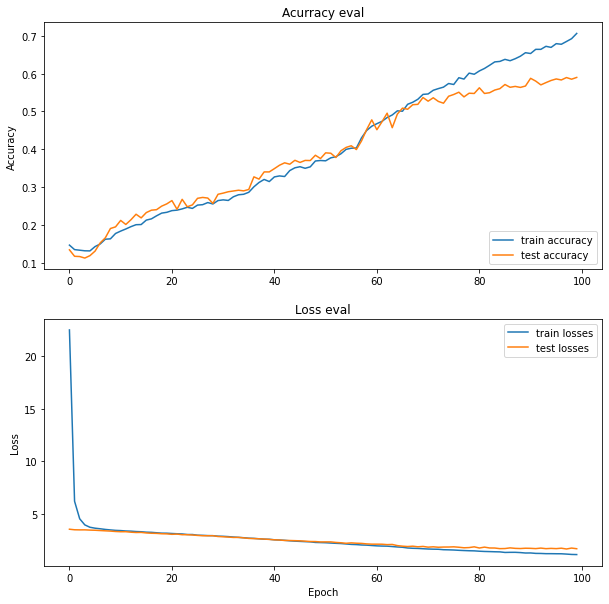

In [ ]:
plot_history(history)

### Solving overfitting
* simpler architecture
* data augmentation
* early stopping
* dropout
* regularization

# 12 How to Implement a CNN for Music Genre Classification

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "./drive/MyDrive/AudioData/data.json"

#load data
def load_data(dataset_path):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)

  #convert lists into numpy array
  inputs = np.array(data['mfcc'])
  targets = np.array(data['labels'])
  
  return inputs, targets

#model architecture
def build_model(input_shape):
  model = keras.Sequential()

  #1st conv layer
  model.add(keras.layers.Conv2D(32, (3,3), activation="relu", input_shape = input_shape))
  model.add(keras.layers.MaxPool2D((3,3), strides = (2,2), padding = 'same'))
  model.add(keras.layers.BatchNormalization())

  #2nd conv layer
  model.add(keras.layers.Conv2D(32, (3,3), activation="relu"))
  model.add(keras.layers.MaxPool2D((3,3), strides = (2,2), padding = 'same'))
  model.add(keras.layers.BatchNormalization())

  #3rd conv layer
  model.add(keras.layers.Conv2D(32, (2, 2), activation="relu"))
  model.add(keras.layers.MaxPool2D((2,2), strides = (2,2), padding = 'same'))
  model.add(keras.layers.BatchNormalization())

  #flatten output and feed it into dense layer
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(64, activation = 'relu'))
  model.add(keras.layers.Dropout(0.3))

  #output layer
  model.add(keras.layers.Dense(10, activation = 'softmax'))

  return model

In [ ]:
#main
inputs, targets = load_data(DATASET_PATH)

inputs = inputs[..., np.newaxis]

#split the data into train adn test sets
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.25) #bizden 3 boyutlu bekler 3d array => (130, 13, 1) olmak zorunda rgb kanalları nasıl 3 ise

In [ ]:
#build the network architecture
input_shape= X_train.shape[1:]
model = build_model(input_shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 128, 11, 32)       320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 6, 32)         0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 6, 32)         128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 62, 4, 32)         9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 31, 2, 32)         0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 31, 2, 32)         128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 1, 32)        

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
#train
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, batch_size = 128)

Epoch 1/100
47/47 [==============================] - 12s 233ms/step - loss: 2.7500 - accuracy: 0.1804 - val_loss: 2.5377 - val_accuracy: 0.1227
Epoch 2/100
47/47 [==============================] - 11s 231ms/step - loss: 2.2590 - accuracy: 0.2671 - val_loss: 2.1417 - val_accuracy: 0.2547
Epoch 3/100
47/47 [==============================] - 11s 232ms/step - loss: 2.0136 - accuracy: 0.3218 - val_loss: 1.9231 - val_accuracy: 0.3433
Epoch 4/100
47/47 [==============================] - 11s 232ms/step - loss: 1.8596 - accuracy: 0.3645 - val_loss: 1.7630 - val_accuracy: 0.3900
Epoch 5/100
47/47 [==============================] - 11s 229ms/step - loss: 1.7582 - accuracy: 0.3885 - val_loss: 1.6419 - val_accuracy: 0.4340
Epoch 6/100
47/47 [==============================] - 11s 234ms/step - loss: 1.6586 - accuracy: 0.4205 - val_loss: 1.5622 - val_accuracy: 0.4547
Epoch 7/100
47/47 [==============================] - 11s 236ms/step - loss: 1.5889 - accuracy: 0.4412 - val_loss: 1.4923 - val_accuracy:

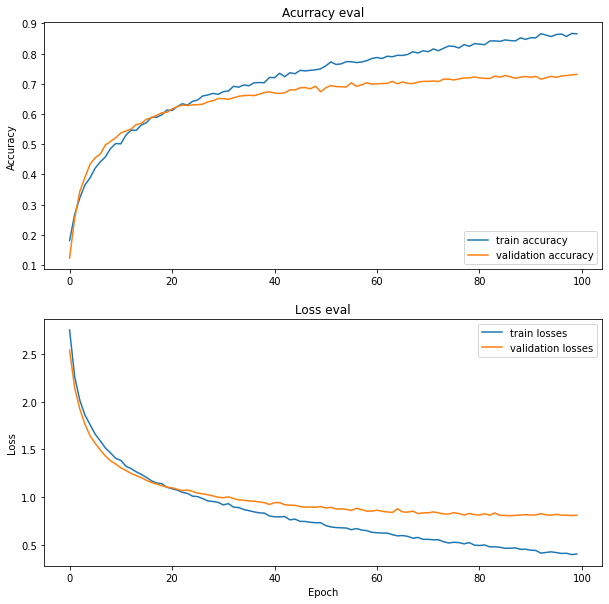

In [ ]:
#visualization
def plot_history(history):
  fig, axs = plt.subplots(2,figsize=(10,10))

  axs[0].plot(history.history["accuracy"], label = "train accuracy")
  axs[0].plot(history.history["val_accuracy"], label = "validation accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc = "lower right")
  axs[0].set_title("Acurracy eval")

  axs[1].plot(history.history["loss"], label = "train losses")
  axs[1].plot(history.history["val_loss"], label = "validation losses")
  axs[1].set_ylabel("Loss")
  axs[1].set_xlabel("Epoch")
  axs[1].legend(loc = "upper right")
  axs[1].set_title("Loss eval")

  plt.show()

plot_history(history)

In [ ]:
#evaluation 
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)
print(f"Acurracy on test set is: {test_acc}")
print(f"Loss on test set is: {test_loss}")

79/79 - 1s - loss: 0.7909 - accuracy: 0.7451
Acurracy on test set is: 0.7450980544090271
Loss on test set is: 0.7908628582954407


In [ ]:
def predict(model, X, y):
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))



In [ ]:
X_to_predict = X_test[101]
y_to_predict = y_test[101]

In [ ]:
predict(model, X_to_predict, y_to_predict)

Target: 5, Predicted label: [5]


In [ ]:
inputs.shape #sr/hop_length*time => 22050 / 512 * 3

(9996, 130, 13, 1)

# 13 How to Implement an RNN-LSTM Network for Music Genre Classification

In [ ]:
#shape of X -> batch size, steps, dimensions

In [12]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATASET_PATH = "./drive/MyDrive/AudioData/data.json"

#load data
def load_data(dataset_path):
  with open(dataset_path, "r") as fp:
    data = json.load(fp)

  #convert lists into numpy array
  inputs = np.array(data['mfcc'])
  targets = np.array(data['labels'])
  
  return inputs, targets

def build_model(input_shape):

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


In [13]:
#main
inputs, targets = load_data(DATASET_PATH)

#split the data into train adn test sets
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.25) #bizden 3 boyutlu bekler 3d array => (130, 13, 1) olmak zorunda rgb kanalları nasıl 3 ise

In [14]:
#build the network architecture
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_model(input_shape)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 130, 64)           19968     
_________________________________________________________________
lstm_7 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


In [15]:
optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer = optimizer, loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [19]:
#train
history = model.fit(X_train, y_train, validation_split = 0.2, epochs = 100, batch_size = 128)

Epoch 1/100
47/47 [==============================] - 14s 291ms/step - loss: 1.1651 - accuracy: 0.5915 - val_loss: 1.2463 - val_accuracy: 0.5587
Epoch 2/100
47/47 [==============================] - 14s 291ms/step - loss: 1.1342 - accuracy: 0.6075 - val_loss: 1.2338 - val_accuracy: 0.5740
Epoch 3/100
47/47 [==============================] - 14s 291ms/step - loss: 1.1240 - accuracy: 0.6083 - val_loss: 1.2394 - val_accuracy: 0.5620
Epoch 4/100
47/47 [==============================] - 14s 291ms/step - loss: 1.1132 - accuracy: 0.6153 - val_loss: 1.2401 - val_accuracy: 0.5693
Epoch 5/100
47/47 [==============================] - 14s 290ms/step - loss: 1.1040 - accuracy: 0.6171 - val_loss: 1.2270 - val_accuracy: 0.5767
Epoch 6/100
47/47 [==============================] - 14s 290ms/step - loss: 1.0853 - accuracy: 0.6273 - val_loss: 1.2273 - val_accuracy: 0.5673
Epoch 7/100
47/47 [==============================] - 14s 291ms/step - loss: 1.0692 - accuracy: 0.6331 - val_loss: 1.2168 - val_accuracy:

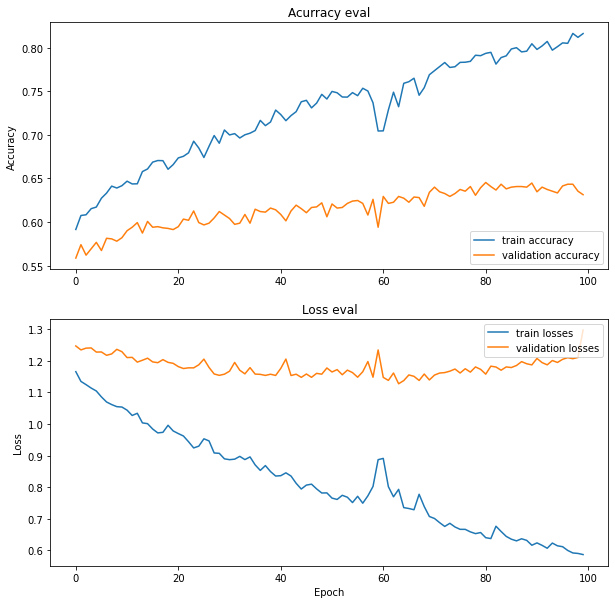

In [20]:
#visualization
def plot_history(history):
  fig, axs = plt.subplots(2,figsize=(10,10))

  axs[0].plot(history.history["accuracy"], label = "train accuracy")
  axs[0].plot(history.history["val_accuracy"], label = "validation accuracy")
  axs[0].set_ylabel("Accuracy")
  axs[0].legend(loc = "lower right")
  axs[0].set_title("Acurracy eval")

  axs[1].plot(history.history["loss"], label = "train losses")
  axs[1].plot(history.history["val_loss"], label = "validation losses")
  axs[1].set_ylabel("Loss")
  axs[1].set_xlabel("Epoch")
  axs[1].legend(loc = "upper right")
  axs[1].set_title("Loss eval")

  plt.show()

plot_history(history)

In [21]:
#evaluation 
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)
print(f"Acurracy on test set is: {test_acc}")
print(f"Loss on test set is: {test_loss}")

79/79 - 2s - loss: 1.2119 - accuracy: 0.6363
Acurracy on test set is: 0.6362544894218445
Loss on test set is: 1.2118885517120361
